In [1]:
!pwd

/home/kpalacio/lenguaje_frontera


# Histogram in HD

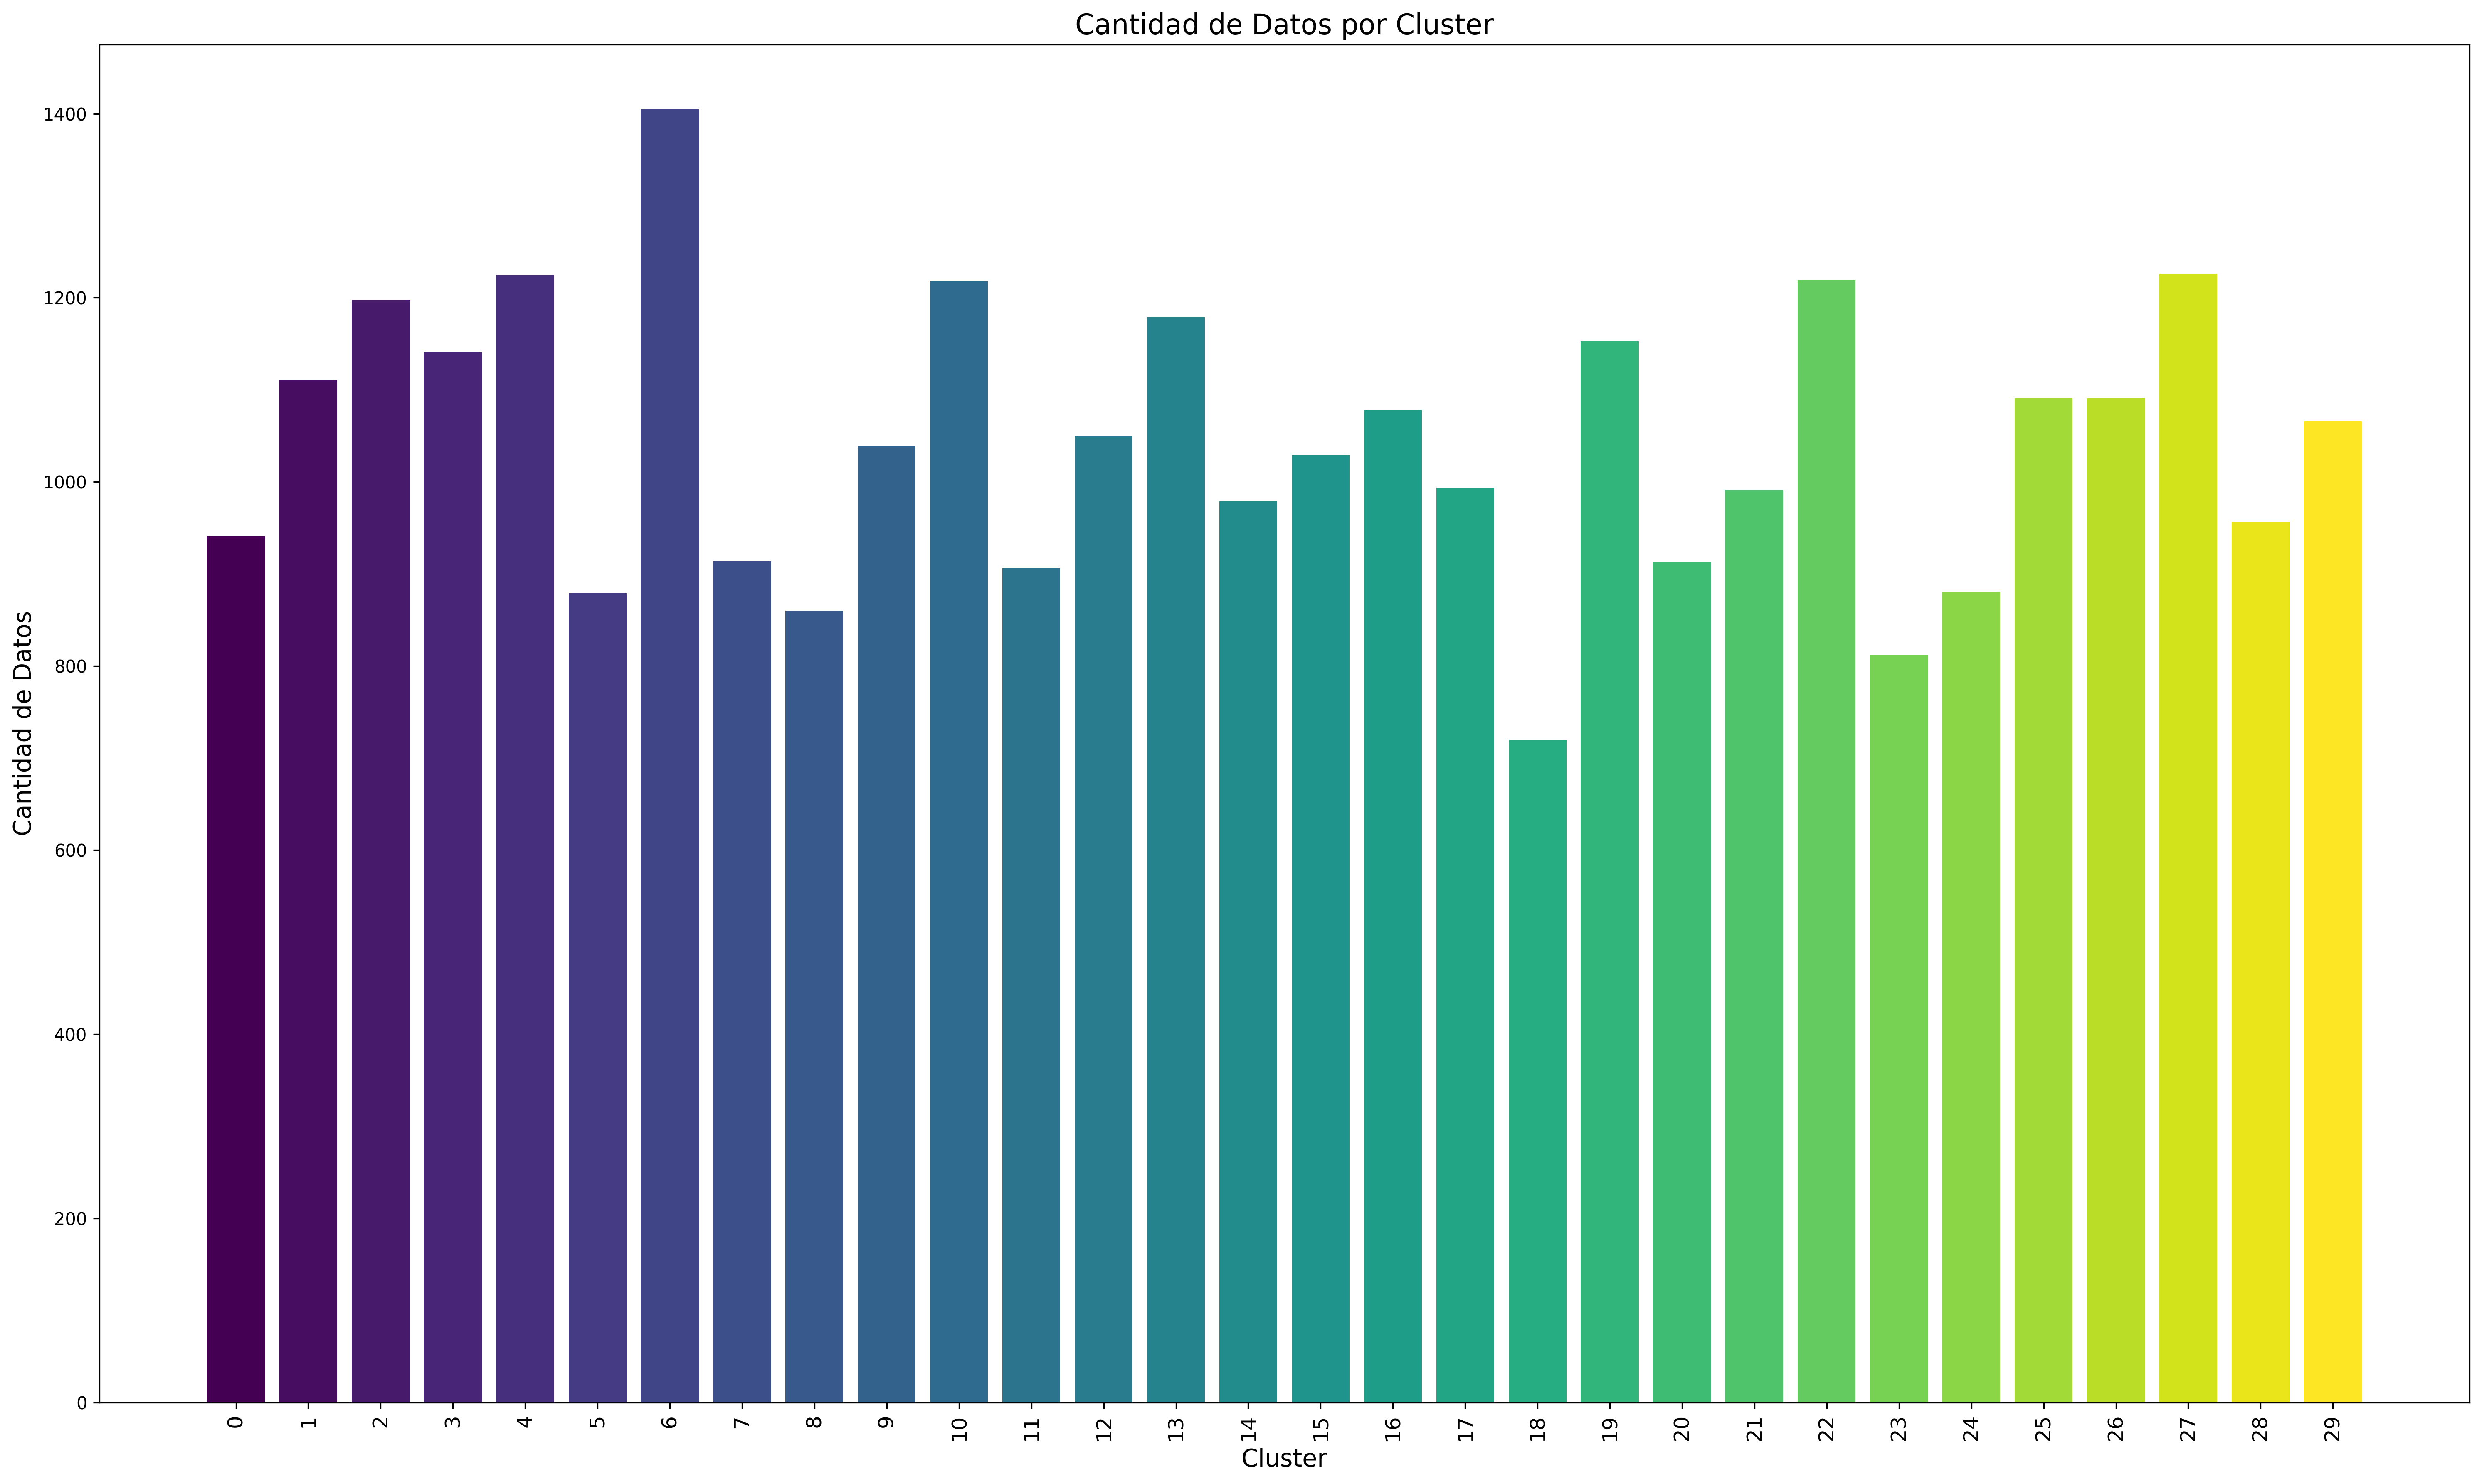

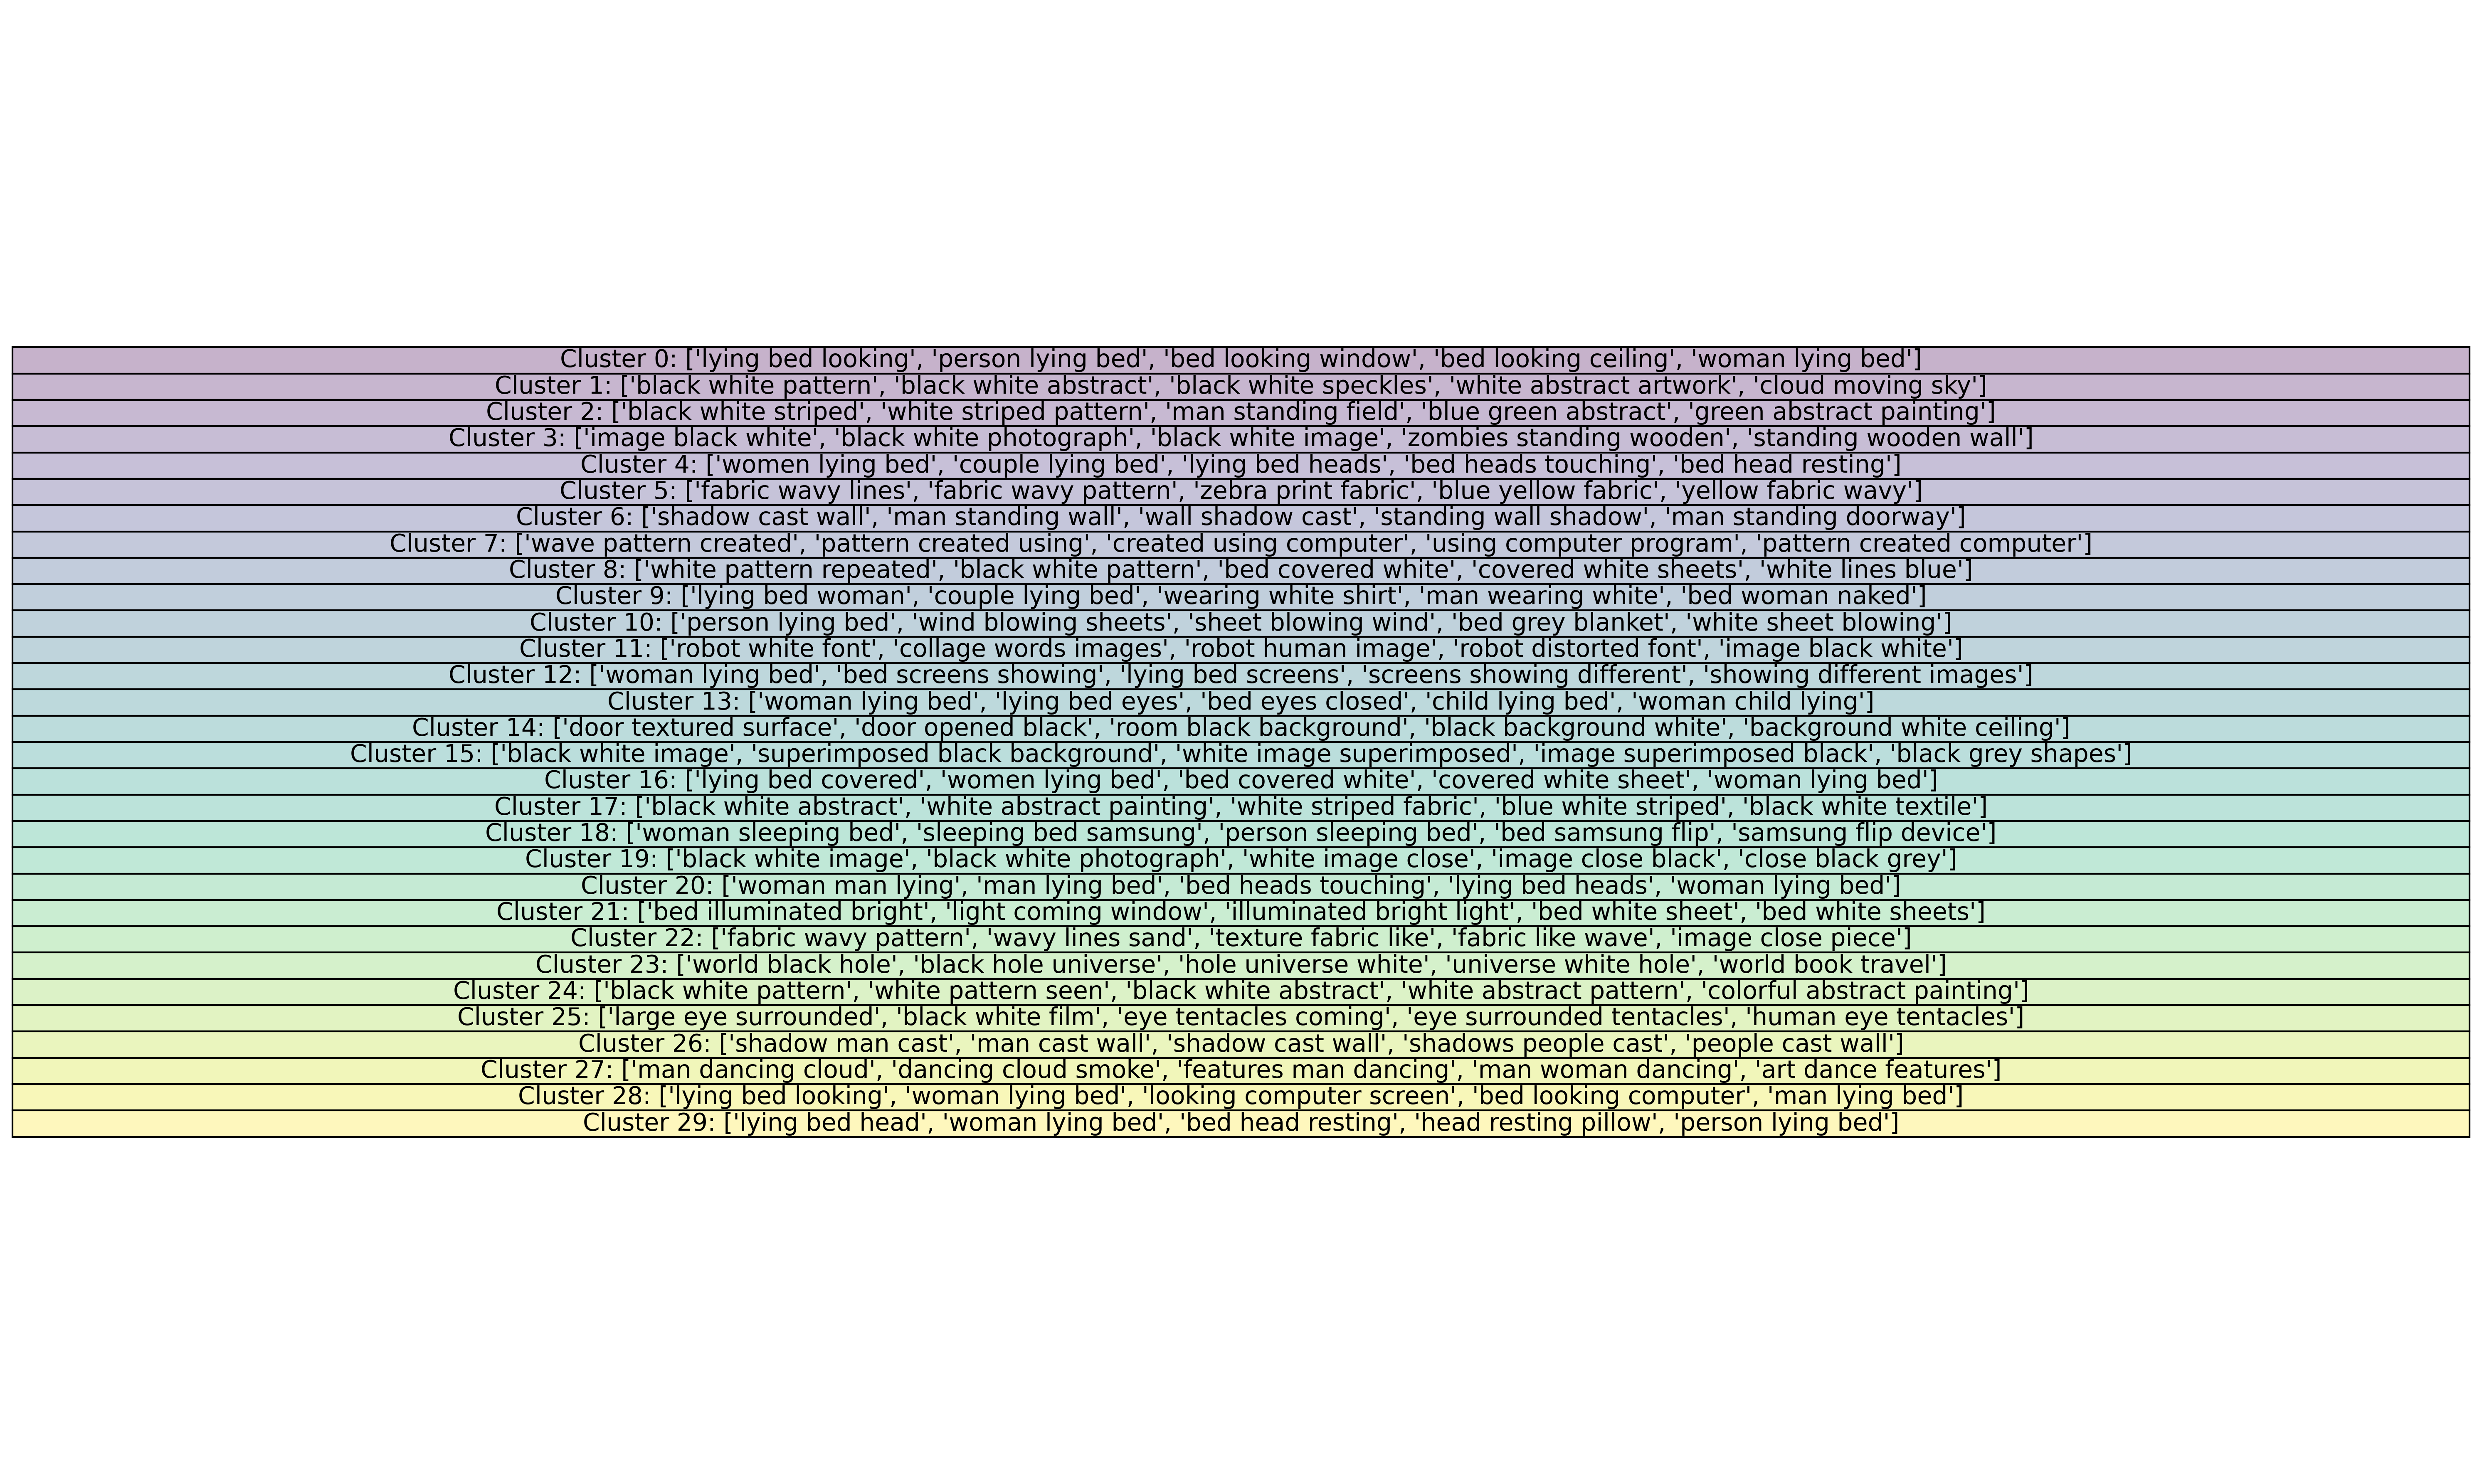

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
df = pd.read_csv("./full_cleaned_kosmos_embeddings_30_cluster_names_and_ngrams_transiciones.csv")

# Suponiendo que el dataframe se llama df
# Agrupar por la columna 'cluster' y contar la cantidad de elementos por cluster
cluster_counts = df.groupby('cluster').size()

# Crear una paleta de colores 'viridis' con tantos colores como clusters
colors = cm.viridis(np.linspace(0, 1, len(cluster_counts)))

# Crear el gráfico de barras con alta resolución (DPI alto)
fig, ax = plt.subplots(figsize=(20, 12), dpi=300)  # Tamaño grande y DPI alto

bars = ax.bar(cluster_counts.index, cluster_counts.values, color=colors)

# Configuración de las etiquetas y el título del gráfico
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Cantidad de Datos', fontsize=14)
ax.set_title('Cantidad de Datos por Cluster', fontsize=16)
plt.xticks(cluster_counts.index, rotation=90, fontsize=12)  # Rotar las etiquetas del eje X y ajustar el tamaño de fuente

# Mostrar el gráfico de barras con alta resolución
plt.tight_layout()
plt.show()

# Crear una nueva figura para la tabla, también con alta resolución
fig, ax = plt.subplots(figsize=(20, 12), dpi=300)  # Tamaño grande y DPI alto

# Preparar los datos para la tabla
table_data = []
for i, cluster_num in enumerate(cluster_counts.index):
    # Obtener la información del cluster_top_3grams
    top_3grams = df[df['cluster'] == cluster_num]['cluster_top_3grams'].iloc[0]
    
    # Agregar el texto "Cluster X: información" a la tabla
    table_data.append([f"Cluster {cluster_num}: {top_3grams}"])

# Crear colores con opacidad ajustada a 0.4
colors_with_alpha = [[(r, g, b, 0.3) for r, g, b, _ in colors]]

# Dibujar la tabla usando el mismo esquema de colores para cada fila con opacidad
table = ax.table(cellText=table_data,
                 cellColours=[[(*colors[i][:3], 0.3)] for i in range(len(cluster_counts))],
                 colLabels=None,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
#the_table.set_fontsize(24)
table.set_fontsize(14)

# Ocultar los ejes y ajustar el tamaño
ax.axis('off')
plt.tight_layout()
plt.show()


## other attempts

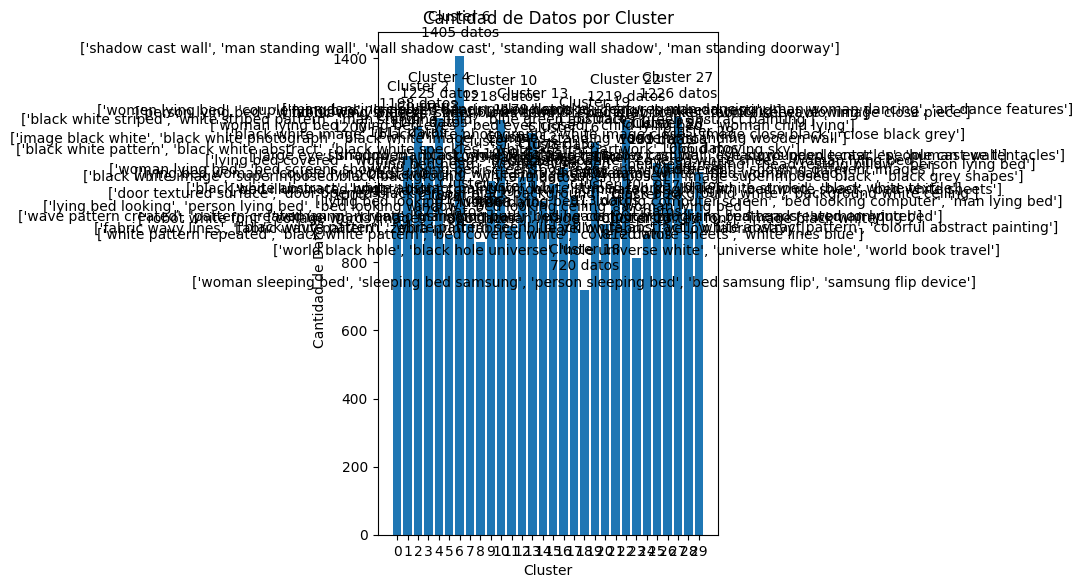

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("./full_cleaned_kosmos_embeddings_30_cluster_names_and_ngrams_transiciones.csv")
# Suponiendo que el dataframe se llama df
# Agrupar por la columna 'cluster' y contar la cantidad de elementos por cluster
cluster_counts = df.groupby('cluster').size()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(cluster_counts.index, cluster_counts.values)

# Agregar etiquetas de texto a cada barra con el número del cluster y los datos de 'cluster_top_3grams'
for bar in bars:
    cluster_num = int(bar.get_x() + bar.get_width() / 2)
    count = int(bar.get_height())
    
    # Obtener los datos de la columna 'cluster_top_3grams' para cada cluster
    top_3grams = df[df['cluster'] == cluster_num]['cluster_top_3grams'].iloc[0]
    
    # Texto que muestra el número del cluster, la cantidad y los 3-grams
    label = f"Cluster {cluster_num}\n{count} datos\n{top_3grams}"
    
    # Posicionar la etiqueta en el centro de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom', fontsize=10)

# Configuración de las etiquetas y el título del gráfico
ax.set_xlabel('Cluster')
ax.set_ylabel('Cantidad de Datos')
ax.set_title('Cantidad de Datos por Cluster')
plt.xticks(cluster_counts.index)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


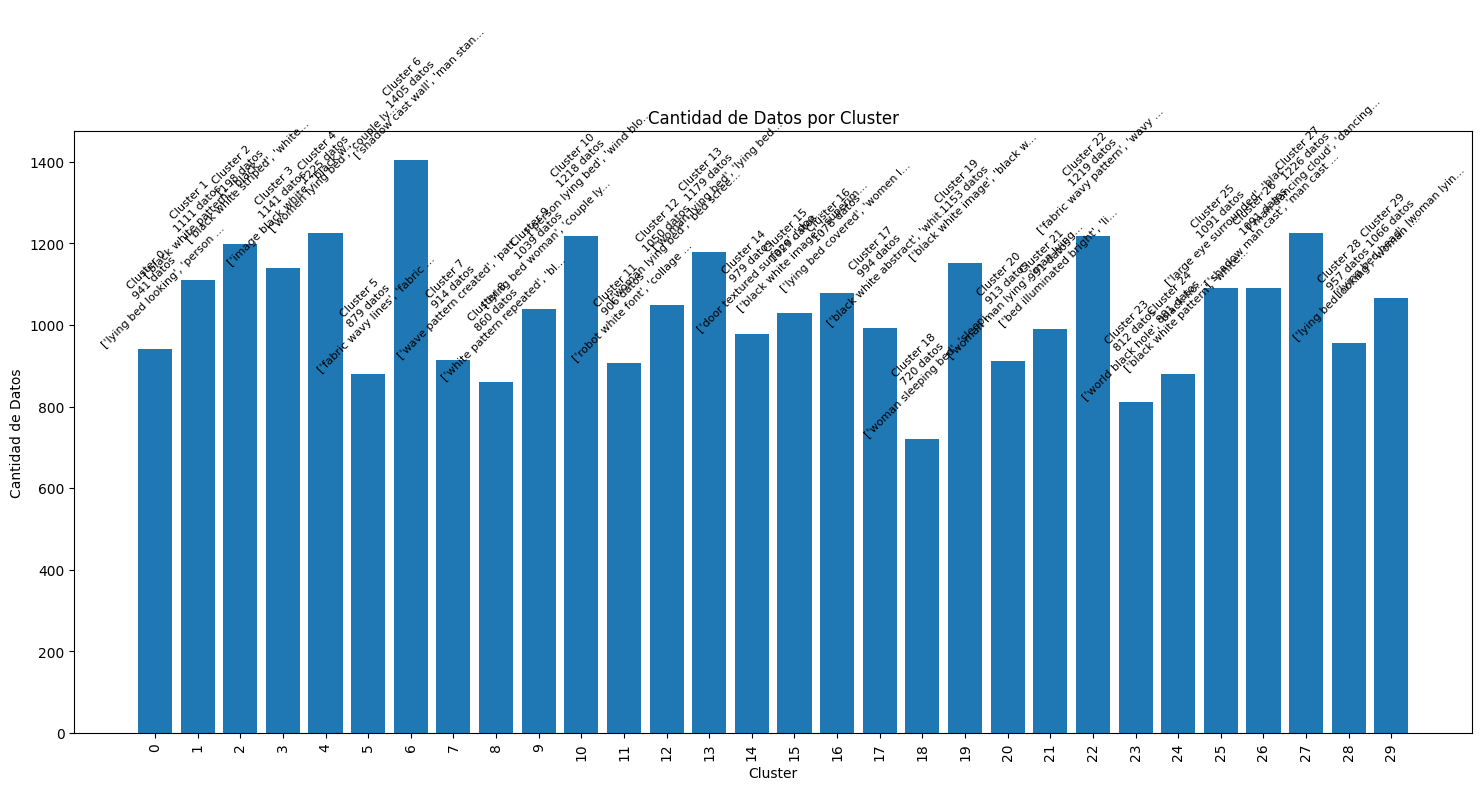

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que el dataframe se llama df
# Agrupar por la columna 'cluster' y contar la cantidad de elementos por cluster
cluster_counts = df.groupby('cluster').size()

# Crear el gráfico de barras (ajustar el tamaño para 30 clusters)
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(cluster_counts.index, cluster_counts.values)

# Limitar la cantidad de caracteres mostrados de cluster_top_3grams
max_text_length = 30

# Agregar etiquetas de texto a cada barra con el número del cluster y los datos de 'cluster_top_3grams'
for bar in bars:
    cluster_num = int(bar.get_x() + bar.get_width() / 2)
    count = int(bar.get_height())
    
    # Obtener los datos de la columna 'cluster_top_3grams' para cada cluster
    top_3grams = df[df['cluster'] == cluster_num]['cluster_top_3grams'].iloc[0]
    
    # Truncar el texto si es muy largo
    top_3grams_truncated = (top_3grams[:max_text_length] + '...') if len(top_3grams) > max_text_length else top_3grams
    
    # Texto que muestra el número del cluster, la cantidad y los 3-grams truncados
    label = f"Cluster {cluster_num}\n{count} datos\n{top_3grams_truncated}"
    
    # Posicionar la etiqueta en el centro de la barra, con un margen para que no se superponga
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, label, ha='center', va='bottom', fontsize=8, rotation=45)

# Configuración de las etiquetas y el título del gráfico
ax.set_xlabel('Cluster')
ax.set_ylabel('Cantidad de Datos')
ax.set_title('Cantidad de Datos por Cluster')
plt.xticks(cluster_counts.index, rotation=90)  # Rotar las etiquetas del eje X

# Ajustar el espacio para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


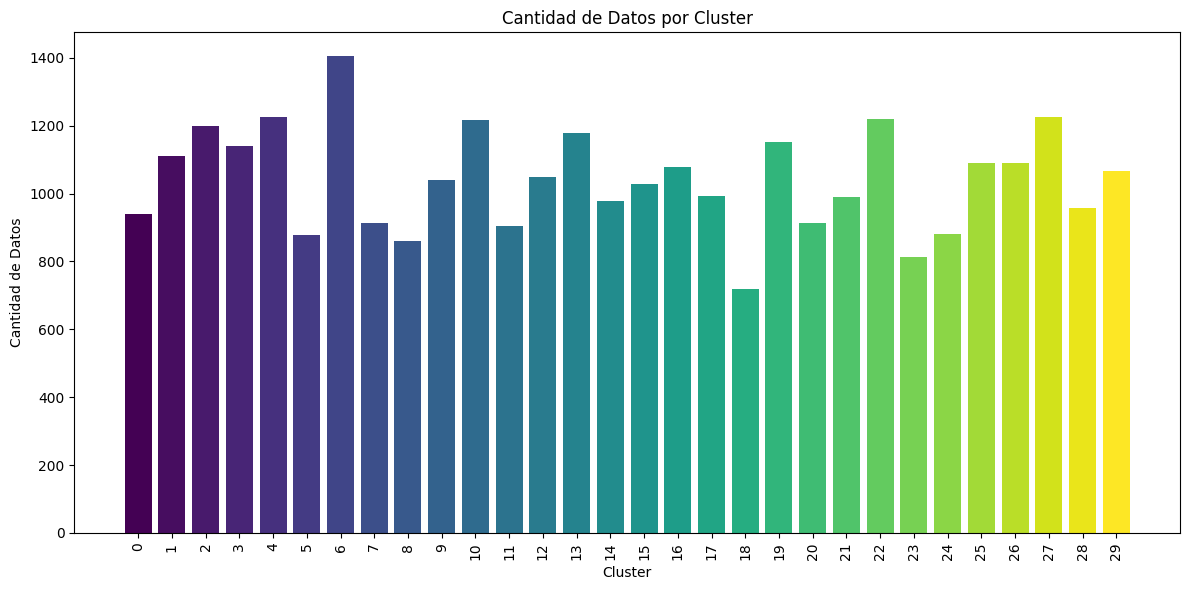

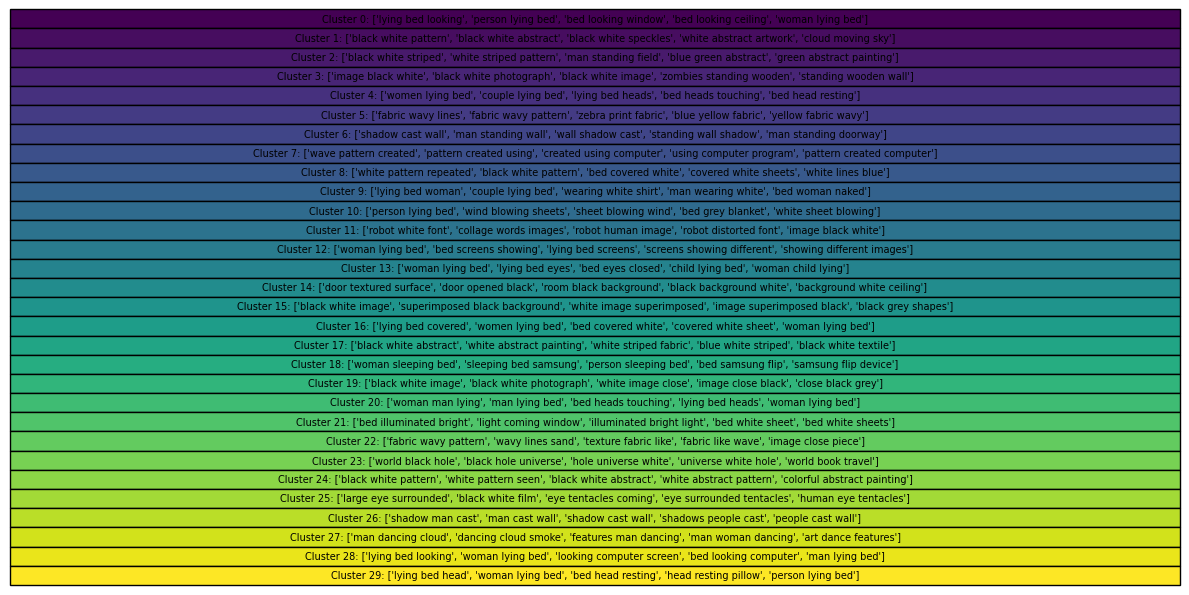

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Suponiendo que el dataframe se llama df
# Agrupar por la columna 'cluster' y contar la cantidad de elementos por cluster
cluster_counts = df.groupby('cluster').size()

# Crear una paleta de colores 'viridis' con tantos colores como clusters
colors = cm.viridis(np.linspace(0, 1, len(cluster_counts)))

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(cluster_counts.index, cluster_counts.values, color=colors)

# Configuración de las etiquetas y el título del gráfico
ax.set_xlabel('Cluster')
ax.set_ylabel('Cantidad de Datos')
ax.set_title('Cantidad de Datos por Cluster')
plt.xticks(cluster_counts.index, rotation=90)  # Rotar las etiquetas del eje X

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()

# Crear una nueva figura para la tabla
fig, ax = plt.subplots(figsize=(12, 6))

# Preparar los datos para la tabla
table_data = []
for i, cluster_num in enumerate(cluster_counts.index):
    # Obtener la información del cluster_top_3grams
    top_3grams = df[df['cluster'] == cluster_num]['cluster_top_3grams'].iloc[0]
    
    # Agregar el texto "Cluster X: información" a la tabla
    table_data.append([f"Cluster {cluster_num}: {top_3grams}"])

# Dibujar la tabla usando el mismo esquema de colores para cada fila
table = ax.table(cellText=table_data,
                 cellColours=[[colors[i]] for i in range(len(cluster_counts))],
                 colLabels=None,
                 cellLoc='center',
                 loc='center')

# Ocultar los ejes y ajustar el tamaño
ax.axis('off')
plt.tight_layout()
plt.show()


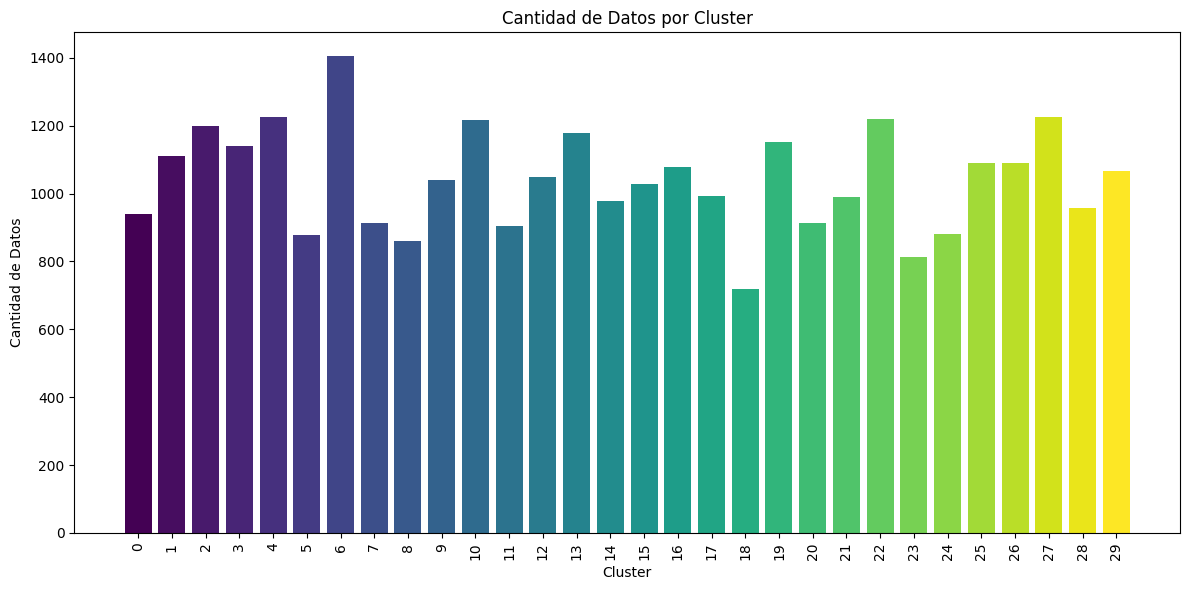

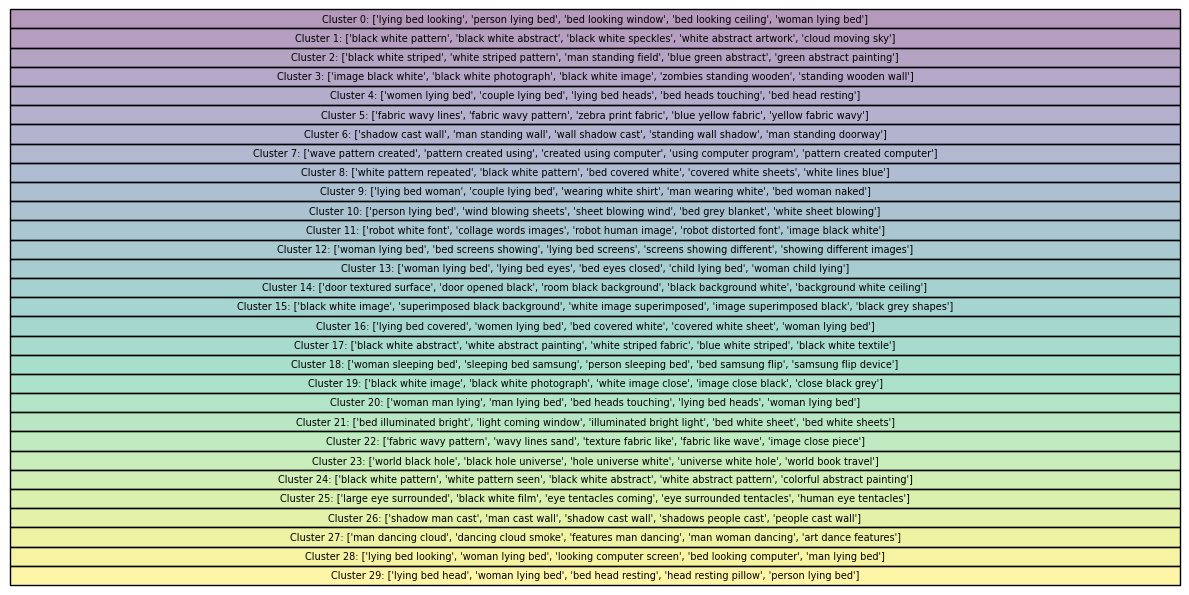

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Suponiendo que el dataframe se llama df
# Agrupar por la columna 'cluster' y contar la cantidad de elementos por cluster
cluster_counts = df.groupby('cluster').size()

# Crear una paleta de colores 'viridis' con tantos colores como clusters
colors = cm.viridis(np.linspace(0, 1, len(cluster_counts)))

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(cluster_counts.index, cluster_counts.values, color=colors)

# Configuración de las etiquetas y el título del gráfico
ax.set_xlabel('Cluster')
ax.set_ylabel('Cantidad de Datos')
ax.set_title('Cantidad de Datos por Cluster')
plt.xticks(cluster_counts.index, rotation=90)  # Rotar las etiquetas del eje X

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()

# Crear una nueva figura para la tabla
fig, ax = plt.subplots(figsize=(12, 6))

# Preparar los datos para la tabla
table_data = []
for i, cluster_num in enumerate(cluster_counts.index):
    # Obtener la información del cluster_top_3grams
    top_3grams = df[df['cluster'] == cluster_num]['cluster_top_3grams'].iloc[0]
    
    # Agregar el texto "Cluster X: información" a la tabla
    table_data.append([f"Cluster {cluster_num}: {top_3grams}"])

# Crear colores con opacidad ajustada a 0.4
colors_with_alpha = [[(r, g, b, 0.4) for r, g, b, _ in colors]]

# Dibujar la tabla usando el mismo esquema de colores para cada fila con opacidad
table = ax.table(cellText=table_data,
                 cellColours=[[(*colors[i][:3], 0.4)] for i in range(len(cluster_counts))],
                 colLabels=None,
                 cellLoc='center',
                 loc='center')

# Ocultar los ejes y ajustar el tamaño
ax.axis('off')
plt.tight_layout()
plt.show()
